<a href="https://colab.research.google.com/github/lujanpro/proyecto_integrado_2_Pro.r/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Marta", "Diego", "Sofia"]
  apellidos = ["Gómez", "Rodríguez", "Pérez", "García", "López", "Martínez", "Sánchez", "Fernández", "González", "Díaz"]
  return random.choice(nombres), random.choice(apellidos)

# Generar datos para el DataFrame
data = []
for i in range(100):
  nombre, apellido = generar_nombre_apellido()
  nro_dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = np.random.randint(1, 11)
  nota2 = np.random.randint(1, 11)
  nota3 = np.random.randint(1, 11)
  faltas = np.random.randint(0, 15)

  data.append([nombre, apellido, nro_dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre", "Apellido", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Nombre,Apellido,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Marta,Sánchez,75148324,Biología,1,10,3,4
1,Sofia,Díaz,52213236,Informática,4,7,6,7
2,Carlos,González,27265081,Biología,2,10,9,3
3,Pedro,García,50549820,Educación Física,8,7,5,14
4,Marta,Martínez,72380875,Física,5,8,5,13
...,...,...,...,...,...,...,...,...
95,Luis,Sánchez,14760885,Ciencias Naturales,9,6,1,8
96,Marta,López,23576963,Música,8,2,6,5
97,Juan,Fernández,64648329,Educación Física,2,1,4,1
98,Carlos,Díaz,70521304,Biología,1,1,10,0


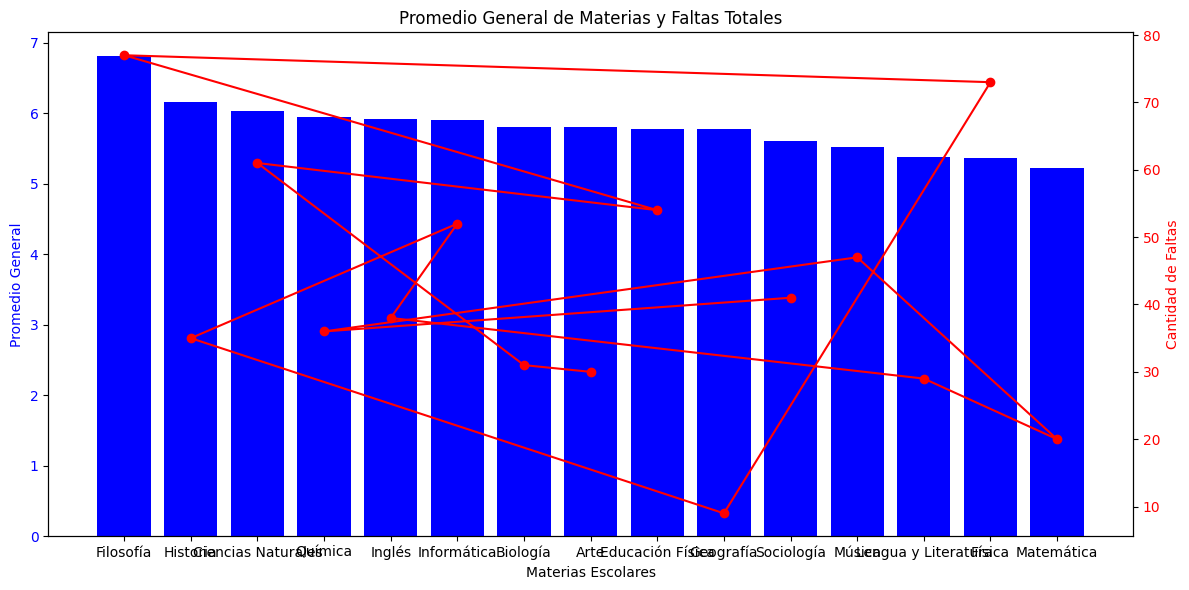

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values, color='blue')
ax1.set_xlabel('Materias Escolares')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General de Materias y Faltas Totales')

# Crear el segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()